In [1]:
# %matplotlib Qt5

import numpy as np
import matplotlib.pyplot as plt

from siriuspy.devices import DVF

from mathphys import imgproc as images


def create_gauss1d():
    gauss1d, indcs1d = images.CurveFitGauss.generate_gaussian_1d(
        indcs=1280, sigma=50, mean=600, amplitude=10)
    gauss1d = images.CurveFitGauss.normalize(
        gauss1d, images.CurveFitGauss.SATURATION_8BITS)
    return gauss1d, indcs1d

def create_gauss1dsat():
    gauss1dsat, indcs1d = images.CurveFitGauss.generate_gaussian_1d(
        indcs=1024, sigma=50, mean=500, amplitude=300, saturation_threshold=images.CurveFitGauss.SATURATION_8BITS)
    return gauss1dsat, indcs1d

def create_gauss2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=254, rand_amplitude=0):
    gauss2d, indcsx2d, indcsy2d = images.CurveFitGauss.generate_gaussian_2d(
        indcs=indcs, sigma=sigma, mean=mean, amplitude=amplitude, rand_amplitude=rand_amplitude)

    gauss2d = images.CurveFitGauss.normalize(
        gauss2d, images.CurveFitGauss.SATURATION_8BITS - 10)
    return gauss2d, indcsx2d, indcsy2d

def create_gauss2dsat():
    gauss2dsat, indcsx2d, indcsy2d = images.CurveFitGauss.generate_gaussian_2d(
        indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250,
        saturation_threshold=100)
    gauss2dsat = images.CurveFitGauss.normalize(gauss2dsat, images.CurveFitGauss.SATURATION_8BITS)
    return gauss2dsat, indcsx2d, indcsy2d

# DVF

In [4]:
dvf = DVF(DVF.DEVICES.CAX_DVF2)

In [5]:
dvf.pvnames

{'CAX:B:BASLER01:Trans1:EnableCallbacks',
 'CAX:B:BASLER01:Trans1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:cam1:Acquire',
 'CAX:B:BASLER01:cam1:AcquirePeriod',
 'CAX:B:BASLER01:cam1:AcquirePeriod_RBV',
 'CAX:B:BASLER01:cam1:AcquireTime',
 'CAX:B:BASLER01:cam1:AcquireTime_RBV',
 'CAX:B:BASLER01:cam1:Acquire_RBV',
 'CAX:B:BASLER01:cam1:ArrayCallbacks',
 'CAX:B:BASLER01:cam1:ArrayCallbacks_RBV',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks',
 'CAX:B:BASLER01:ffmstream1:EnableCallbacks_RBV',
 'CAX:B:BASLER01:image1:ArrayData',
 'CAX:B:BASLER01:image1:EnableCallbacks',
 'CAX:B:BASLER01:image1:EnableCallbacks_RBV'}

In [6]:
dvf.connected

True

In [5]:
dvf.cmd_acquire_on()

True

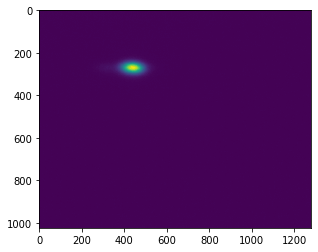

In [7]:
plt.imshow(dvf.image)

In [ ]:
data = dvf.image

# CurveFitGauss

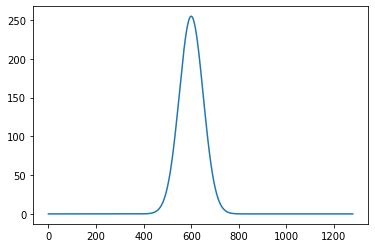

In [2]:
# generate 1D gaussian curve and normalize it

gauss1d, indcs1d = create_gauss1d()
plt.plot(indcs1d, gauss1d)

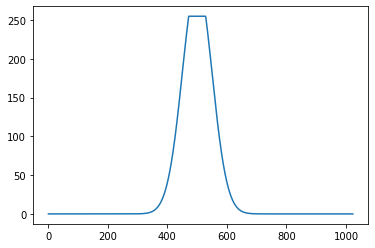

In [3]:
# generate saturated 1D gaussian curve and normalize it

gauss1dsat, indcs1d = create_gauss1dsat()
plt.plot(indcs1d, gauss1dsat)

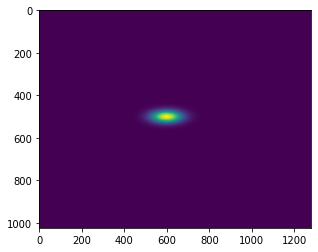

In [4]:
# generate 2D gaussian curve and normalize it

gauss2d, indcsx2d, indcsy2d = create_gauss2d()
plt.imshow(gauss2d)

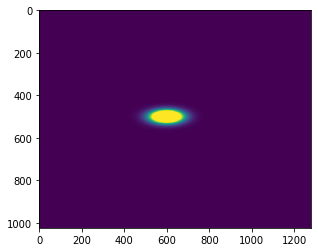

In [5]:
# generate saturated 2D gaussian curve and normalize it

gauss2dsat, indcsx2d, indcsy2d = create_gauss2dsat()
plt.imshow(gauss2dsat)

In [6]:
%timeit gauss1d, indcs1d = images.CurveFitGauss.generate_gaussian_1d(indcs=1280, sigma=50, mean=500, amplitude=10)

41 µs ± 786 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit gauss2dsat, indcsx2d, indcsy2d = images.CurveFitGauss.generate_gaussian_2d(indcs=(1280, 1024), sigma=(50, 20), mean=(600,500), amplitude=250, saturation_threshold=100)

34 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit data = images.CurveFitGauss.normalize(np.ones((1280, 1024)), 200)

2.85 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Image1D

size            : 1280
intensity_min   : 2.296295285676758e-38
intensity_max   : 255.0
intensity_avg   : 24.96836757933223
intensity_sum   : 31959.510501545257
saturation_val  : 255
saturated       : True


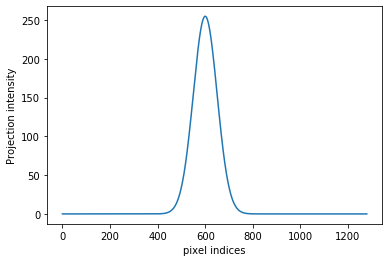

In [2]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D(data=data)
img.imshow()
print(img)

size            : 1024
intensity_min   : 5.2323186718338715e-22
intensity_max   : 255.0
intensity_avg   : 35.07491375352191
intensity_sum   : 35916.71168360644
saturation_val  : 255
saturated       : True


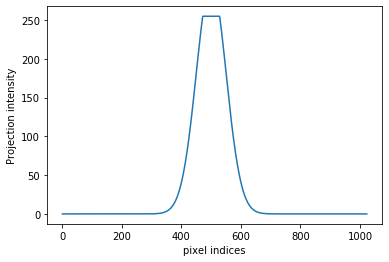

In [6]:
gauss1dsat, indcs1d = create_gauss1dsat()

data = gauss1dsat

img = images.Image1D(data=data)
img.imshow()
print(img)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b2bcf8d0>)

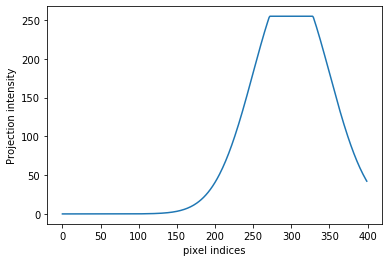

In [7]:
img.imshow(crop=[200,600])

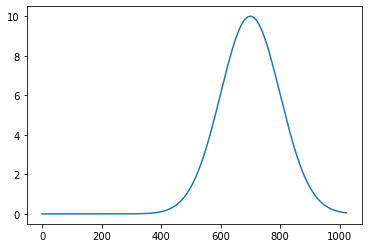

In [8]:
data, indcs = img.generate_gaussian_1d(sigma=100, mean=700, amplitude=10)
plt.plot(indcs, data)

In [9]:
%timeit img = images.Image1D(data=gauss1d)

6.73 µs ± 53.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Image1D_ROI

size            : 1280
intensity_min   : 2.296295285676758e-38
intensity_max   : 255.0
intensity_avg   : 24.96836757933223
intensity_sum   : 31959.510501545257
saturation_val  : 255
saturated       : True
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b28eacf8>)

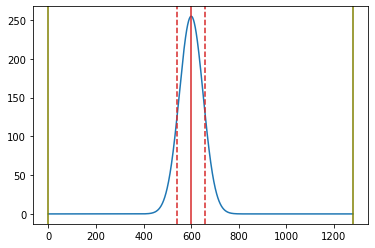

In [22]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_ROI(data=data)
print(img)
img.imshow()

In [23]:
%timeit img = images.Image1D_ROI(data=data)

28.6 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit img.create_trimmed()

29.6 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image2D

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b2a89668>)

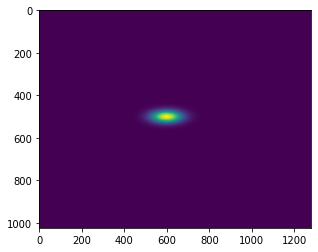

In [13]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D(data=data)
print(img)
img.imshow()

sizey           : 1024
sizex           : 1280
intensity_min   : 1.8569429752924563e-186
intensity_max   : 254.99999999999997
intensity_avg   : 2.3424736157271964
intensity_sum   : 3070327.017605951
saturation_val  : 200
saturated       : True


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b29a4d68>)

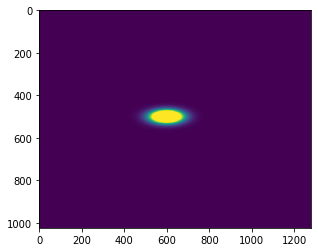

In [16]:
# saturate image for testing 

gauss2dsat, indcsx2d, indcsy2d = create_gauss2dsat()

data = gauss2dsat

img = images.Image2D(data=gauss2dsat, saturation_threshold=200)
print(img)
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b290d2e8>)

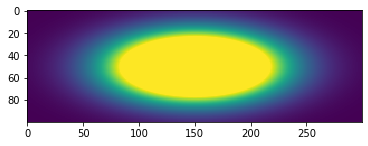

In [17]:
img.imshow(cropx=[450,750], cropy=[450,550])

In [18]:
img.is_saturated

True

In [19]:
%timeit img = images.Image2D(data=data)

478 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%timeit img.intensity_min

598 µs ± 90.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit img.intensity_sum

377 µs ± 3.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit img.is_saturated

113 ns ± 0.496 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Image2D_ROI

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : True
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum   : 1539380.4002589986
saturation_val  : 255
saturated       : True
roi             : [0, 1024]
roi_center      : 500
roi_fwhm        : 46


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b2853400>)

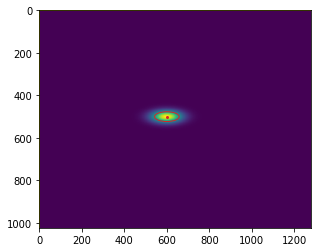

In [24]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d()

# data = dvf.image
data = gauss2d

img = images.Image2D_ROI(data=data)
print(img)
img.imshow()

In [25]:
x0, y0 = int(img.imagex.roi_center), int(img.imagey.roi_center)
sx, sy = int(1.0*img.imagex.roi_fwhm), int(1.0*img.imagey.roi_fwhm)
coef = 2.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b27b5a20>)

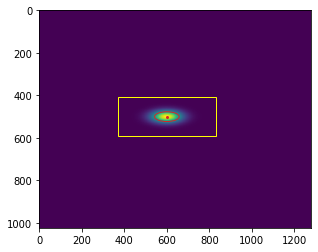

In [26]:
img.imshow()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b2732470>)

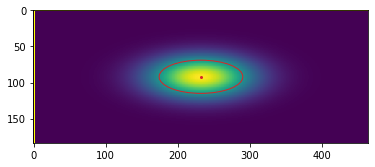

In [27]:
img.imshow(cropx=img.roix, cropy=img.roiy)

In [28]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- projx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : True
roi             : [368, 832]
roi_center      : 600
roi_fwhm        : 116
--- projy ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum   : 1539380.4002589986
saturation_val  : 255
saturated       : True
roi             : [408, 592]
roi_center      : 500
roi_fwhm        : 46


In [29]:
%timeit img = images.Image2D_ROI(data)

1.71 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%timeit img.create_trimmed()

187 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Image2D_CMom

In [26]:
# data = dvf.image
data = create_image(saturation_level=None)
img = image.Image2D_CMom(data)

In [27]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [0, 1024]
roix            : [0, 1280]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.0
roi_meany       : 600.0000000000001
roi_sigmax      : 54.57629702699901
roi_sigmay      : 23.79835140981942
roi_angle       : -1.4888835758979924


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d11d95ac8>)

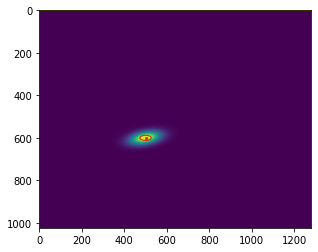

In [5]:
img.imshow()

In [6]:
img.roix = [0, 1000]
img.roiy = [400, 800]

sizey           : 1024
sizex           : 1280
intensity_min   : 9.605912733632567e-261
intensity_max   : 255.0
intensity_avg   : 1.2223909403463709
intensity_sum   : 1602212.253330795
saturated       : False
roiy            : [400, 800]
roix            : [0, 1000]
roiy_center     : 600
roix_center     : 500
roiy_fwhm       : 50
roix_fwhm       : 116
roi_meanx       : 500.00000000000006
roi_meany       : 600.0
roi_sigmax      : 98.79365048279605
roi_sigmay      : 43.07961769713597
roi_angle       : -1.5254750742642278


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d07efea20>)

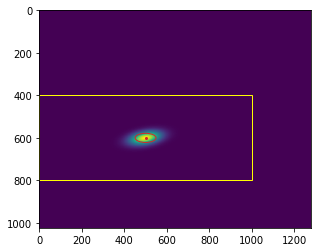

In [7]:
print(img)
img.imshow()

In [10]:
%timeit img._calc_cmom1()

17.6 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit img.calc_central_moment(2, 0)

9.98 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit img._update_image_roi()

30.8 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Image1D_Fit

size            : 1280
intensity_min   : 2.296295285676758e-38
intensity_max   : 255.0
intensity_avg   : 24.96836757933223
intensity_sum   : 31959.510501545257
saturation_val  : 255
saturated       : True
roi             : [0, 1280]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 256.45564939389493
roi_mean        : 599.9713539800109
roi_sigma       : 49.99205574492041
roi_fit_err     : 0.5644299037840311 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b27072e8>)

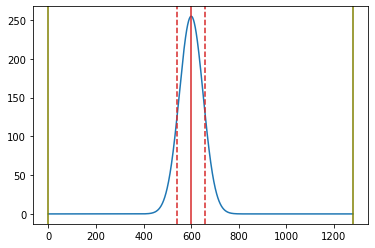

In [31]:
gauss1d, indcs1d = create_gauss1d()

data = gauss1d

img = images.Image1D_Fit(data=data)
print(img)
img.imshow()

size            : 1280
intensity_min   : 2.296295285676758e-38
intensity_max   : 255.0
intensity_avg   : 24.96836757933223
intensity_sum   : 31959.510501545257
saturation_val  : 255
saturated       : True
roi             : [400, 800]
roi_center      : 600
roi_fwhm        : 116
roi_amplitude   : 255.00000000000037
roi_mean        : 600.0
roi_sigma       : 49.99999999999999
roi_fit_err     : 1.3861478832539313e-13 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66b2685630>)

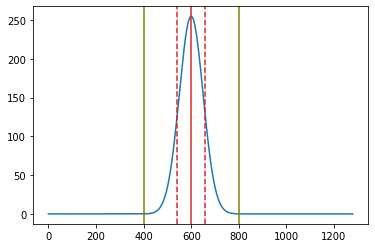

In [32]:
img.roi = [400, 800]
print(img)
img.imshow()

In [33]:
%timeit img = images.Image1D_Fit(data=data)

586 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Image2D_Fit

In [35]:
fitx = getattr(img, 'fitx')
roi = getattr(fitx, 'roi')

sizey           : 1024
sizex           : 1280
intensity_min   : 7.13648672857493e-187
intensity_max   : 245.0
intensity_avg   : 1.1744540407249437
intensity_sum   : 1539380.4002589984
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 1.1060469639567934e-36
intensity_max   : 12282.478545691894
intensity_avg   : 1202.6409377023424
intensity_sum   : 1539380.4002589982
saturation_val  : 255
saturated       : False
roi             : [100, 600]
roi_center      : 599
roi_fwhm        : 57
roi_amplitude   : 12282.478545691949
roi_mean        : 600.0000000000001
roi_sigma       : 50.00000000000002
roi_fit_err     : 3.04782415606082e-13 %
roi_amplitude   : 12282.478545691949
roi_mean        : 600.0000000000001
roi_sigma       : 50.00000000000002
roi_fit_err     : 3.04782415606082e-13 %
--- fity ---
size            : 1024
intensity_min   : 9.932460514493616e-145
intensity_max   : 30706.196364229756
intensity_avg   : 1503.3011721279283
intensity_sum

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffa7d20ed68>)

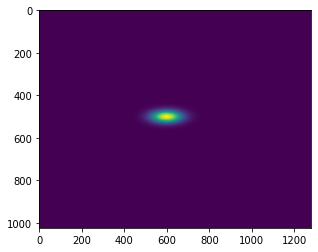

In [28]:
gauss2d, indcsx2d, indcsy2d = create_gauss2d(rand_amplitude=0)

# data = dvf.image
data = gauss2d

img = images.Image2D_Fit(data=data, roix=[100, 600], roiy=[300, 400])
print(img)
img.imshow()

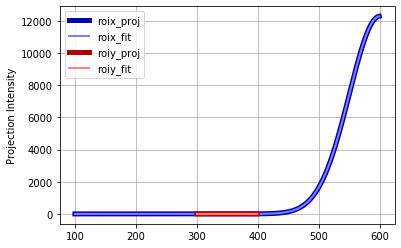

In [29]:
img.plot_projections()

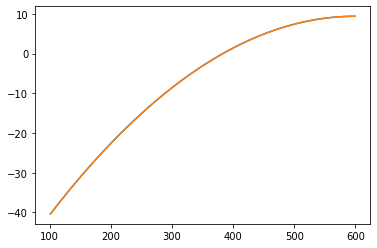

In [30]:
roi = img.fitx.roi  # [400, 800]  # img.roix
sel_roi = (roi[0] < img.fitx.roi_indcs) & (img.fitx.roi_indcs < roi[1])
sel = (img.fitx.roi_proj > 0) & sel_roi
vecx, vecy = img.fitx.roi_indcs[sel], np.log(img.fitx.roi_proj[sel])
pfit = np.polyfit(vecx, vecy, 2)
vecy_fit = np.polyval(pfit, vecx)

plt.plot(vecx, vecy, label='data')
plt.plot(vecx, vecy_fit, label='fit')

In [22]:
np.sum(sel_roi)

0

In [5]:
x0, y0 = int(img.fitx.roi_center), int(img.fity.roi_center)
sx, sy = int(1.0*img.fitx.roi_fwhm), int(1.0*img.fity.roi_fwhm)
coef = 1.0
roix = [int(x0 - coef*sx), int(x0 + coef*sx)]
roiy = [int(y0 - coef*sy), int(y0 + coef*sy)]
img.roi = [roix, roiy]

In [6]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : -0.9625138543409757
intensity_max   : 245.0
intensity_avg   : 1.1710776169446846
intensity_sum   : 1534954.8540817369
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : -62.37785572471214
intensity_max   : 12284.725462913068
intensity_avg   : 1199.183479751357
intensity_sum   : 1534954.854081737
saturation_val  : 255
saturated       : False
roi             : [483, 715]
roi_center      : 599
roi_fwhm        : 116
roi_amplitude   : 12263.81889935562
roi_mean        : 599.9589677100561
roi_sigma       : 50.469537464893705
roi_fit_err     : 0.4416190068092634 %
roi_amplitude   : 12263.81889935562
roi_mean        : 599.9589677100561
roi_sigma       : 50.469537464893705
roi_fit_err     : 0.4416190068092634 %
--- fity ---
size            : 1024
intensity_min   : -73.25131342521077
intensity_max   : 30625.40948286926
intensity_avg   : 1498.9793496891966
intensity_sum   : 1534954.854

In [7]:
img.roi = [roix, roiy]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7146feb710>)

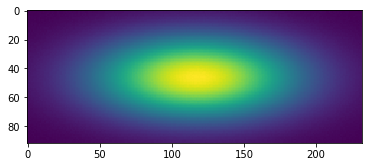

In [8]:
img.imshow(cropx=img.fitx.roi, cropy=img.fity.roi)

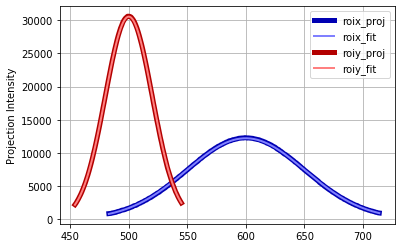

In [9]:
img.plot_projections()

In [11]:
%timeit img = images.Image2D_Fit(data=data)

2.7 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Scipy.curve_fit

In [45]:
from mathphys.functions import save_pickle

save_pickle(dvf.image, 'beam_img_5')

In [48]:
from scipy.optimize import curve_fit

In [53]:
?curve_fit

In [52]:
def gauss(x, offset, amp, mean, sigma):
    return offset + amp * np.exp(-0.5*((x - mean)/sigma)**2)

In [54]:
p0 = (0, 4000, 450, 35)

(array([  95.21240671, 3923.50369668,  436.36269082,   33.89514178]),
 array([[ 1.59739227e+02, -1.30630489e+02,  6.30046149e-03,
         -1.59736735e+00],
        [-1.30630489e+02,  1.38392327e+02, -5.52073100e-03,
          1.11800422e+00],
        [ 6.30046149e-03, -5.52073100e-03,  3.12811195e-03,
         -5.51439078e-05],
        [-1.59736735e+00,  1.11800422e+00, -5.51439078e-05,
          1.92560006e-02]]))

In [69]:
x, y = img.roix_indcs, img.roix_proj
p, _ = curve_fit(gauss, x, y , p0)
yfit = gauss(x, *p)

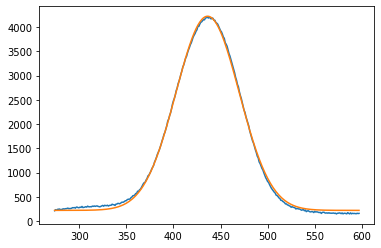

In [70]:
plt.plot(x, y)
plt.plot(x, yfit)
plt.show()

In [71]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 105
intensity_avg   : 1.2360107421875
intensity_sum   : 1620064
saturated       : False
roiy            : [197, 345]
roix            : [274, 598]
roiy_center     : 272
roix_center     : 436
roiy_fwhm       : 37
roix_fwhm       : 81
roiy_sigma      : 27.54266219650197
roix_sigma      : 62.504422945912005
roiy_mean       : 271.95580204262967
roix_mean       : 429.3134707636719
roiy_amplitude  : 4658.488918410126
roix_amplitude  : 2046.4641107258974
roiy_gauss_err  : 42.51819850708045 %
roix_gauss_err  : 45.52227850679792 %


In [72]:
p

array([ 219.89923765, 4001.73337729,  436.30238679,   33.57719957])